In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [13]:
%pip install -q decorator==5.0.9
!pip install -q ipywidgets

import csv
import math
import re
import imp
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from collections import Counter

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -q cltk==1.0.22
%pip install -q strsim
%pip install -q leven

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# importing local modules

import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils
import features.tf_idf.n_gram as thesisTfIdfNgramFeatures
import features.count_vectorizer.n_gram as thesisCountVectorizerNgramFeatures
import similarities.cosine as thesisCosineSimilarities
import similarities.levenshtein as thesisLevenshteinSimilarities
import vocabulary.vocabulary as thesisVocabulary
import features.lexical as thesisLexicalFeatures
import similarities.cosine as thesisCosineSimilarity
import text_cleanup.text_cleanup as thesisTextCleanUp
import p_aligment.p_aligment as thesisPAligment

imp.reload(thesisLexicalFeatures)
imp.reload(thesisCosineSimilarity)
imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)
imp.reload(thesisTfIdfNgramFeatures)
imp.reload(thesisVocabulary)
imp.reload(thesisCosineSimilarities)
imp.reload(thesisTextCleanUp)
imp.reload(thesisCountVectorizerNgramFeatures)
imp.reload(thesisPAligment)
imp.reload(thesisLevenshteinSimilarities)

<module 'similarities.levenshtein' from '../src/similarities/levenshtein.py'>

# Possible errors to csv

In [5]:
possible_mistakes_london_to_london_distance_1 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_london_by_new_line(),
    thesisDataReader.get_london_by_new_line(),
    error_threshold = 1
)


In [6]:
possible_mistakes_zwickau_to_zwickau_distance_1 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_zwickau_by_new_line(),
    thesisDataReader.get_zwickau_by_new_line(),
    error_threshold = 1
)


In [7]:
possible_mistakes_breslau_to_breslau_distance_1 = thesisLevenshteinSimilarities.create_version_possible_errors_mapping(
    thesisDataReader.get_breslau_by_new_line(),
    thesisDataReader.get_breslau_by_new_line(),
    error_threshold = 1
)


In [24]:
def create_variants_csv(fileName, variants):
    with open(f'../computed_data/words_variants/distance_1/{fileName}.csv','w') as out:
        csv_out=csv.writer(out)
        csv_out.writerow(['original_word','variants', 'variants_count'])
        for i in [(w, variants[w]) for i, w in enumerate(variants) if len(variants[w]) > 0]:
            csv_out.writerow((i[0], i[1], len(i[1])))
    

for p in [
    ('london_to_london', possible_mistakes_london_to_london_distance_1),
    ('zwickau_to_zwickau', possible_mistakes_zwickau_to_zwickau_distance_1),
    ('breslau_to_breslau', possible_mistakes_breslau_to_breslau_distance_1)
]:
    create_variants_csv(p[0], p[1])
        


In [26]:
variants_that_appears_in_all_version = []

for i, n in enumerate(possible_mistakes_london_to_london_distance_1):
    if n in possible_mistakes_zwickau_to_zwickau_distance_1 and n in possible_mistakes_breslau_to_breslau_distance_1:
        variants_that_appears_in_all_version.append(n)

In [28]:
len(variants_that_appears_in_all_version)

1991

# Similarity score for chop

In [54]:
burchard_based_on_london_corpus = thesisDataReader.get_burchard_candidate_version_based_on_p_aligment_london_base()
burchard_based_on_zwickau_corpus = thesisDataReader.get_burchard_candidate_version_based_on_p_aligment_zwickau_base()

In [55]:
london_zwickau_breslau_strongly_similar_df = pd.read_csv('../computed_data/p_aligment/by_new_line/strongly_similar/london_zwickau_breslau.csv').drop(['Unnamed: 0'], axis=1)
zwickau_london_breslau_strongly_similar_df = pd.read_csv('../computed_data/p_aligment/by_new_line/strongly_similar/zwickau_london_breslau.csv').drop(['Unnamed: 0'], axis=1)

In [56]:
result = []

for index, row in london_zwickau_breslau_strongly_similar_df.iterrows():
    london_text = row['london text']
    zwickau_text = row['zwickau text']
    
    london_without_shared_words = london_text
    zwickau_withoud_shared_words = zwickau_text
    
    for word in london_text.split():
        match_in_london = re.search(r'\b' + word + r'\b', london_text)
        match_in_zwickau = re.search(r'\b' + word + r'\b', zwickau_text)
        if match_in_london and match_in_zwickau:
            london_without_shared_words = re.sub(r'\b' + word + r'\b', '', london_without_shared_words).replace('  ', ' ').strip()
            zwickau_withoud_shared_words = re.sub(r'\b' + word + r'\b', '', zwickau_withoud_shared_words).replace('  ', ' ').strip()
      
    result.append([london_without_shared_words, zwickau_withoud_shared_words])

In [57]:
london_zwickau_breslau_strongly_similar_with_chop_df = pd.DataFrame(data=result, columns=['london chop', 'zwickau chop']).join(london_zwickau_breslau_strongly_similar_df)

In [61]:
london_zwickau_breslau_strongly_similar_with_chop_df

,london chop,zwickau chop,london text,zwickau text,zwickau p#,zwickau score,breslau text,breslau p#,breslau score
0,ueteribus historiis legamus beatus libris posi...,inueniamus scripturis mempiticos appolonius ca...,cum in ueteribus historiis legamus sicut dicit...,cum sicut dicit ieronimus quosdam inueniamus l...,0,0.812947,uenerabantur quondam iudei sancta sanctorum qu...,1,0.228345
1,festinet pacem hominibus maiestate,festinabit magestate,quis cristianus hiis uisis non festinet uenire...,quis cristianus hiis uisis non festinabit ueni...,1,0.896212,uenerabantur quondam iudei sancta sanctorum qu...,1,0.326126
2,defluentem iudicatum porta ciuitatis succenden...,fluentem iudicari succedentem plena extat exti...,redeat post hec in ierusalem ut uideat et audi...,redeat post in ierusalem uideat et audiat in t...,2,0.887962,uenerabantur quondam iudei sancta sanctorum qu...,1,0.486159
3,augent quot quot media nabenia maromea nestori...,augeant quod medea iabenia maronite nestoriari...,sunt preterea quedam que in locis ilis deuotio...,sunt preterea quedam que in locis ilis deuotio...,3,0.815394,sunt preterea que deuotionem excitant ampliore...,2,0.358153
4,domumque cognationem dereliquentem deserentem ...,domum congnationem suam derelinquentem deferen...,eia domine deus uideo secundum ueteres histori...,eia domine deus uideo secundum ueteres histori...,4,0.864038,sunt preterea que deuotionem excitant ampliore...,2,0.397394
...,...,...,...,...,...,...,...,...,...
213,strongoli duabus eo episcopi talanario ienuens...,strangoli sumitatem montis ipso tasanaxio ianu...,de lippari nauigantes per miliaria uenimus in ...,de lippari nauigantes per miliaria uenimus in ...,212,0.871923,sunt preterea que deuotionem excitant ampliore...,2,0.120797
214,paranoria ut alpiam,peranona dicta scariotis malpiam apostolorum,de strongoli igitur mouentes auta et sperantes...,de strongoli igitur mouentes auta et sperantes...,213,0.917238,procedendo igitur de accon per primam diuisioe...,24,0.078676
215,boias secundum sicut maius fornicem triumpalem...,baias ile circundatur infinitis eorumdem ortus...,egressi itaque de galea uenimus boias de quo l...,egressi itaque de galea uenimus baias de quo l...,214,0.891483,regia erat hec ciuitas in monte pulcra nimis u...,40,0.134890
216,ciprianum ferentinum anagniam fortinum antonin...,queo quam ciparum felitinum anaginam fortunum ...,in neapoli in castro saluatoris uidi ouum uirg...,in neapoli in castro saluatoris uidi ouum uirg...,215,0.857767,uenerabantur quondam iudei sancta sanctorum qu...,1,0.110843


In [66]:
london_chop_corpus = list(london_zwickau_breslau_strongly_similar_with_chop_df['london chop'])
zwickau_chop_corpus = list(london_zwickau_breslau_strongly_similar_with_chop_df['zwickau chop'])

In [67]:
london_chop_corpus

['ueteribus historiis legamus beatus libris positi menpiticos apolonius caucasum scitas indiam bragmanos iartam uanerabantur cerubin futuri aput uenerabilis quociens tociens linteaminibus',
 'festinet pacem hominibus maiestate',
 'defluentem iudicatum porta ciuitatis succendentem plana exstat exstitit quando sanctis insignia nulo modo',
 'augent quot quot media nabenia maromea nestoriani ducenteni quibus quimpiam emitentes',
 'domumque cognationem dereliquentem deserentem iluc transuolantem sanctuaribus lacob tanta sumus consecrauit iesus cotidie resonat ecclesia uniuersa quem anni circulum recolit psalendo',
 'hec surianis querebam interrogans enim magnum dictum perambulaui',
 'ita a legentibus imaginatione conprehendi ea acconensem nominatam supra mare quatuor lineas quatuor respondents tria duodecim colocata',
 'descriptio terre sancte est duodecim duarum istud pilistiim lambardia',
 'tigride egiptum nuncupatur fluuios eufraten tigrum tauro itidem adiacet sinus tocius nuncupatur',
 

In [68]:
zwickau_chop_corpus

['inueniamus scripturis mempiticos appolonius cancasum sticas iarcam uenerabantur cernibulum uenerabilius apud quotiens totiens lintiaminibus',
 'festinabit magestate',
 'fluentem iudicari succedentem plena extat extitit cum factis insignita nulomodo',
 'augeant quod medea iabenia maronite nestoriarii egipcii uiri mulieres ducentem ubi quippiam emictentes',
 'domum congnationem suam derelinquentem deferentem uenientem sanctioribus iacob tarditatem negligentiam sacrauit iesu tota die nocte resonant eclesie uniuerse annum recolat psalando',
 'frater fratrum per annos quibus frater prouincie ilius fui uolui inscriptis redactam etiam per figuram depingere facilius posset ab longitudo latitudo dispositio comprehendi hoc siris quos ductores interpretes frequenter mecum habui de omnibus inuestigans uolui quodam uero de quibus sepe dubios esse uideram mouere sepius questiones licet plene singula uiderim uolui tamen de his etiam ponere testimonium aliorum utpote iosepi terra ipsa natus conuersa

In [69]:
london_chop_p_score_by_london = thesisLevenshteinSimilarities.get_p_score(london_chop_corpus, possible_mistakes_london_to_london_distance_1)

In [70]:
london_chop_p_score_by_zwickau = thesisLevenshteinSimilarities.get_p_score(london_chop_corpus, possible_mistakes_zwickau_to_zwickau_distance_1)

In [71]:
zwickau_chop_p_score_by_london = thesisLevenshteinSimilarities.get_p_score(zwickau_chop_corpus, possible_mistakes_london_to_london_distance_1)

In [72]:
zwickau_chop_p_score_by_zwickau = thesisLevenshteinSimilarities.get_p_score(zwickau_chop_corpus, possible_mistakes_zwickau_to_zwickau_distance_1)

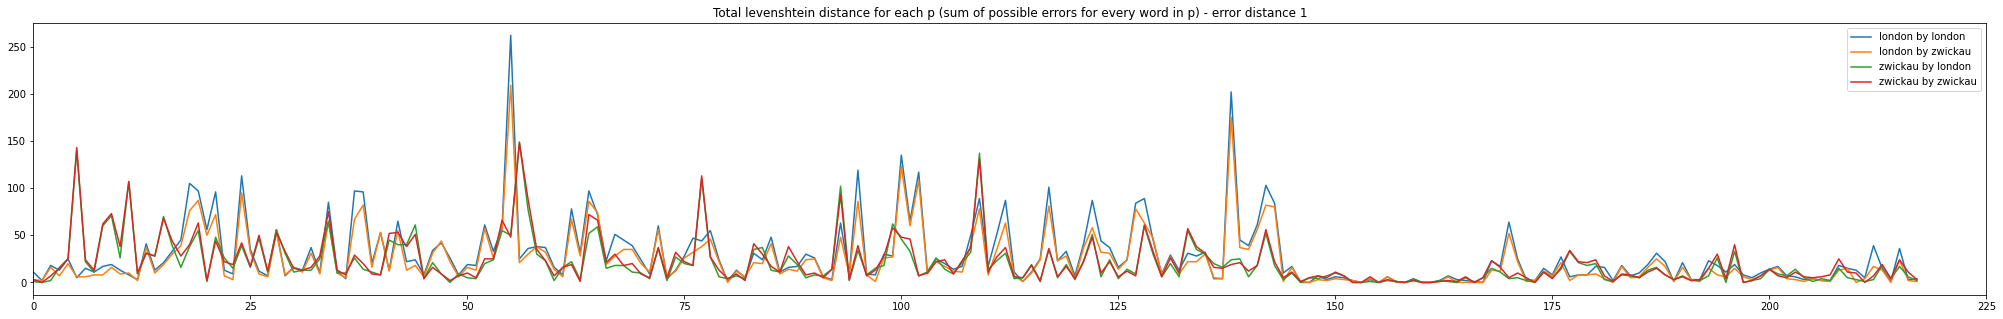

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot(london_chop_p_score_by_london, label='london by london')
ax.plot(london_chop_p_score_by_zwickau, label='london by zwickau')
ax.plot(zwickau_chop_p_score_by_london, label='zwickau by london')
ax.plot(zwickau_chop_p_score_by_zwickau, label='zwickau by zwickau')


ax.set_xlim([0, 225])
ax.set_title('Total levenshtein distance for each p (sum of possible errors for every word in p) - error distance 1')
ax.legend()

In [79]:
london_chop_p_score_by_london[55]

262

In [80]:
london_chop_corpus[55]

'hoc sciendum adhuc edam codorlahomor torreos tunc utique dicebatur dictus iste appelatus dum erat natus anticipationem creditur esse deut hoc primo fuit filiis uenientibus essent cades barne uenturis cades barne tunc erant sed iste nunquam loquitur faran prohibiti domino eum intrare deut correi galaad enim separatus iabec isti lacob transiuisset infra eleuans oculos sopet postea imediate correi ibidem distet subito mortuum fere habitationum confinio habitauit socer eius ismel gen factus uir gnarus sagitandi moratus solitudine ipse eius duxit alias hiis quas prius habuerat inter quas una erat colibama ane sebeon euehi iste euehus filius erat canaan partibus scitopoleos galilea montes gelboe cui uicinus ualde rediret facili occurrere fratri textus tacite innuere enim recedente laban pergebat cepto itinere obuios angelos dei dixit castra dei sunt appelauit nomen loci manaim id castra sub galaad tribu gad misit nuntios fratem suum ibidem eum redierunt infra seperauit munera fratri gregibu

In [81]:
zwickau_chop_corpus[55]

'alios edon codorlaomoris horreos deuteronomio secundo ista terra unquam deuteronomius horrei idumea sicud scriptum iabot transiuisisset eleuatis oculis socot inmediate post horrei sicut multum habitationis eorum duplices sui fuisse alterius uxoris transierunt alium iminet'

In [83]:
london_chop_p_score_by_london[138]

202

In [85]:
london_chop_corpus[138]

'ierusalem austrum sita ciuitas ila ueri dauid ortu insignis in sinistra parte uie uersus ebron extra uiam tamen ad iactum arcus unius prius tamen occurrit sepulcrum racel ad dexteram iuxta uiam cui piramis pulcra iminet quam edificauit lacob in titulum monumenti racel supponens eidem super tumbam lapides grandes secundum numerum filiorum isrel sunt iuxta sepulcrum racel inueniuntur quidam lapili omnino sicut cicera dispositi quos uidi solent coligere peregrini propter dicta quedam ibi dicuntur fuisse facta uero ciuitatis turris ader siue gregis ubi lacob dicitur tempore aliquo post mortem racelis mansisse pecora sua pauisse iactus arcuum distans etiam pastores custodientes uigilias noctis supra gregem suum in hora naciuitatis cristi uiderunt audierunt angelos cantantes gloria in excelsis deo etiam nuntiauerunt esse natum mundi saluatorem'

In [84]:
zwickau_chop_corpus[138]

'monte sacarie uia tecuam sanctus karicon abbas sepultus cum suis monacis omnes eo migrante migrauerunt ostenditur usque sepultura bus'

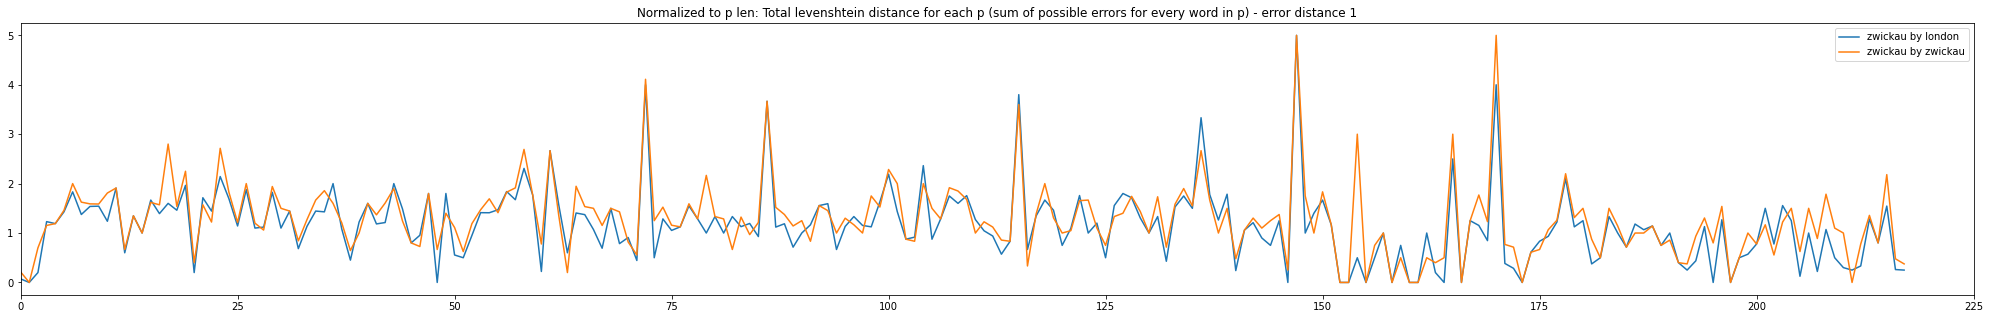

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

# ax.plot([ p / len(london_chop_corpus[i].split()) if len(london_chop_corpus[i].split()) > 0 else 0 for i, p in enumerate(london_chop_p_score_by_london)], label='london by london')
# ax.plot([ p / len(london_chop_corpus[i].split()) if len(london_chop_corpus[i].split()) > 0 else 0 for i, p in enumerate(london_chop_p_score_by_zwickau)], label='london by zwickau')
ax.plot([ p / len(zwickau_chop_corpus[i].split()) if len(zwickau_chop_corpus[i].split()) > 0 else 0 for i, p in enumerate(zwickau_chop_p_score_by_london)], label='zwickau by london')
ax.plot([ p / len(zwickau_chop_corpus[i].split()) if len(zwickau_chop_corpus[i].split()) > 0 else 0 for i, p in enumerate(zwickau_chop_p_score_by_zwickau)], label='zwickau by zwickau')


ax.set_xlim([0, 225])
ax.set_title('Normalized to p len: Total levenshtein distance for each p (sum of possible errors for every word in p) - error distance 1')
ax.legend()

In [90]:
for i, p in enumerate(london_chop_p_score_by_london):
    if len(london_chop_corpus[i].split()) == 0:
        print(f'found zero lenght', i)
        print(london_chop_corpus[i])

found zero lenght 155

found zero lenght 158

found zero lenght 160

found zero lenght 161



In [92]:
london_chop_corpus[150: 157]

['quarta sicut oppidum lictore',
 'unquam mirabilibus barbicanis non deberet expungnare',
 'peregrinum dimidiam',
 'recepererunt',
 'est fuerit nauem',
 '',
 'oppidum iude remiserunt pilistiim']

In [93]:
london_chop_p_score_by_london[157]

1